In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [3]:
os.chdir(r"C:/Users/user/OneDrive/문서/ToBig's/Session1/Tobigs18기_1주차_EDA&GIT 강의자료")

In [4]:
HR_att = pd.read_csv("HR_Employee_Attrition.csv")
HR_att

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
HR_att.shape 

(1470, 35)

In [12]:
HR_att.info() # 1470개의 행, 35개의 변수(column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# 범주형(명목형, 순서형) 변수 object type으로 바꾸기 
HR_att['Education'] = HR_att['Education'].astype(object)
HR_att['EnvironmentSatisfaction'] = HR_att['EnvironmentSatisfaction'].astype(object)
HR_att['JobInvolvement'] = HR_att['JobInvolvement'].astype(object)
HR_att['JobLevel'] = HR_att['JobLevel'].astype(object)
HR_att['JobSatisfaction'] = HR_att['JobSatisfaction'].astype(object)
HR_att['PerformanceRating'] = HR_att['PerformanceRating'].astype(object)
HR_att['RelationshipSatisfaction'] = HR_att['RelationshipSatisfaction'].astype(object)
HR_att['StockOptionLevel'] = HR_att['StockOptionLevel'].astype(object)
HR_att['WorkLifeBalance'] = HR_att['WorkLifeBalance'].astype(object)

In [141]:
HR_att.isnull().sum().to_frame('nan_count') #결측치 없음

,nan_count
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## 범주형 변수, 수치형 변수 type별로 탐색

In [6]:
HR_ctg = [col for col in HR_att if HR_att[col].dtypes == "object"]
HR_num = [col for col in HR_att if HR_att[col].dtypes == "int64"]

In [86]:
HR_att.loc[:,HR_ctg].describe() # 범주형 변수

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,5,9,4,3,1,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,Y,No,3,3,0,3
freq,1233,1043,961,572,606,453,882,868,543,326,459,673,1470,1054,1244,459,631,893


In [87]:
HR_att.loc[:,HR_num].describe() # 수치형 변수

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


### 1) Categorical variable

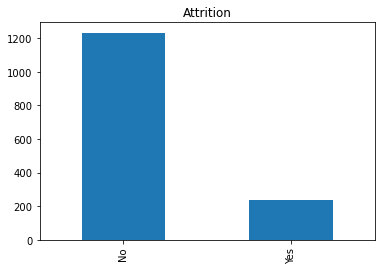

In [88]:
# 1. Attrition 퇴직여부 (종속변수)
HR_att[HR_ctg[0]].value_counts().plot(kind='bar')
plt.title(HR_ctg[0])
plt.show()

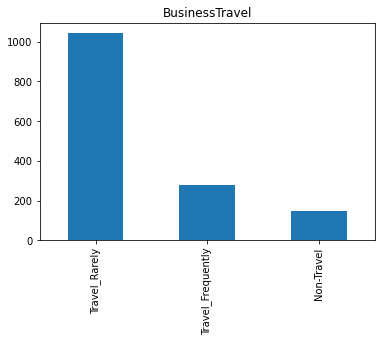

In [89]:
# 2. BusinessTravel: 출장의 빈도
HR_att[HR_ctg[1]].value_counts().plot(kind='bar')
plt.title(HR_ctg[1])
plt.show()

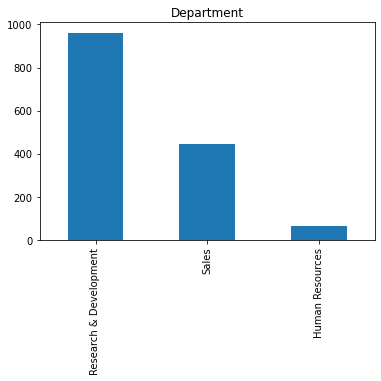

In [90]:
# 3. Department: 업무분야
HR_att[HR_ctg[2]].value_counts().plot(kind='bar')
plt.title(HR_ctg[2])
plt.show()

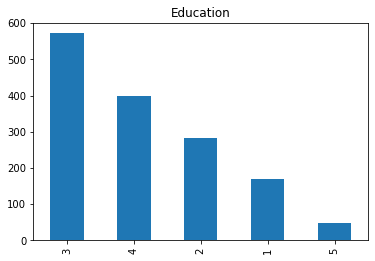

In [91]:
# 4. Education: 교육의 정도
HR_att[HR_ctg[3]].value_counts().plot(kind='bar')
plt.title(HR_ctg[3])
plt.show()

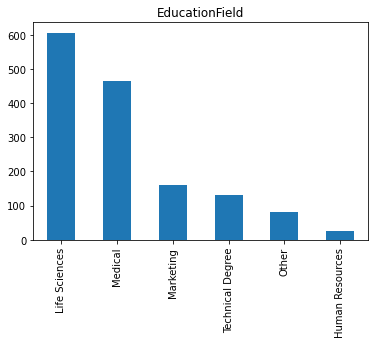

In [92]:
# 5. EducationField: 전공
HR_att[HR_ctg[4]].value_counts().plot(kind='bar')
plt.title(HR_ctg[4])
plt.show()

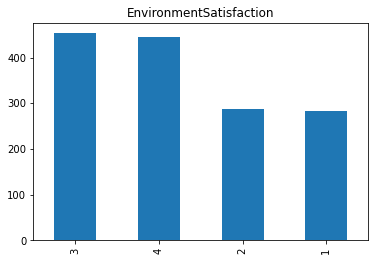

In [93]:
# 6. EnvironmentSatisfaction: 업무 환경에 대한 만족도
HR_att[HR_ctg[5]].value_counts().plot(kind='bar')
plt.title(HR_ctg[5])
plt.show()

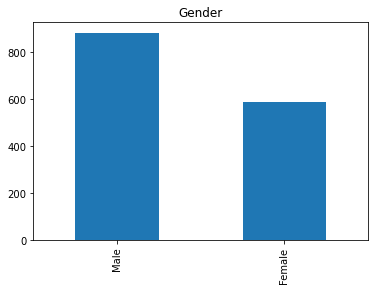

In [94]:
# 7. Gender: 성별
HR_att[HR_ctg[6]].value_counts().plot(kind='bar')
plt.title(HR_ctg[6])
plt.show()

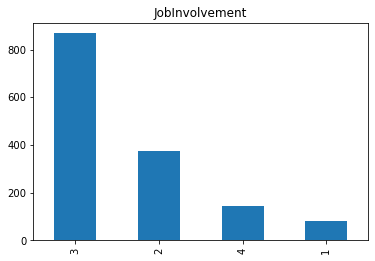

In [95]:
# 8. JobInvolvement: 업무 참여도
HR_att[HR_ctg[7]].value_counts().plot(kind='bar')
plt.title(HR_ctg[7])
plt.show()

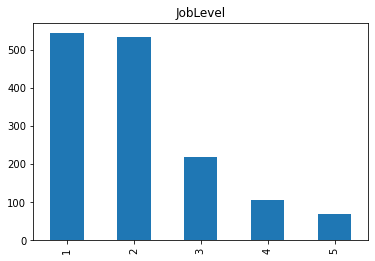

In [96]:
# 9. JobLevel: 업무의 수준
HR_att[HR_ctg[8]].value_counts().plot(kind='bar')
plt.title(HR_ctg[8])
plt.show()

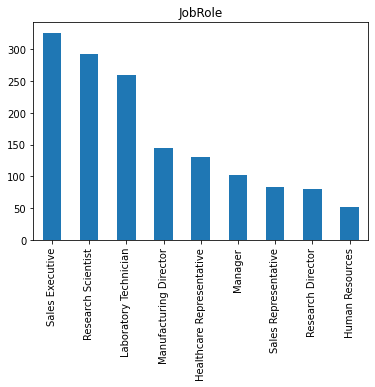

In [97]:
# 10. JobRole: 업무 종류
HR_att[HR_ctg[9]].value_counts().plot(kind='bar')
plt.title(HR_ctg[9])
plt.show()

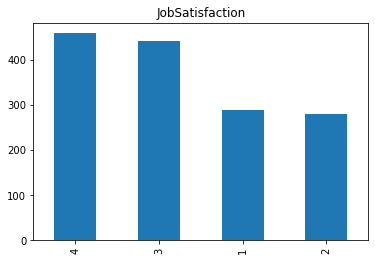

In [98]:
# 11. JobSatisfaction: 업무 만족도
HR_att[HR_ctg[10]].value_counts().plot(kind='bar')
plt.title(HR_ctg[10])
plt.show()

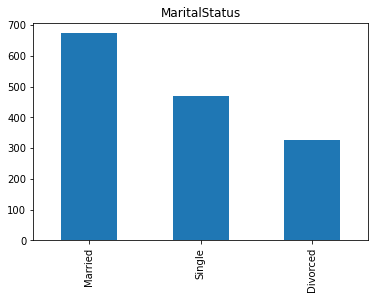

In [100]:
# 12. MaritalStatus: 결혼 여부
HR_att[HR_ctg[11]].value_counts().plot(kind='bar')
plt.title(HR_ctg[11])
plt.show()

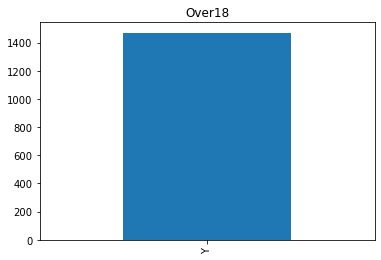

In [101]:
# 13. Over18: 18세 이상
HR_att[HR_ctg[12]].value_counts().plot(kind='bar')
plt.title(HR_ctg[12])
plt.show()

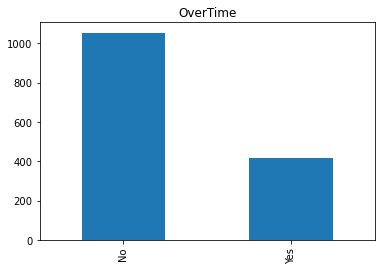

In [102]:
# 14. OverTime: 규정외 노동시간
HR_att[HR_ctg[13]].value_counts().plot(kind='bar')
plt.title(HR_ctg[13])
plt.show()

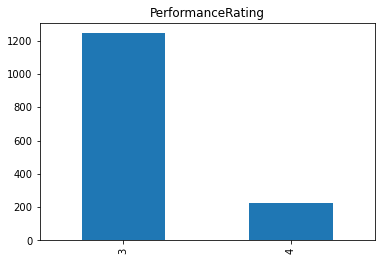

In [103]:
# 15. JPerformanceRating: 업무 성과
HR_att[HR_ctg[14]].value_counts().plot(kind='bar')
plt.title(HR_ctg[14])
plt.show()

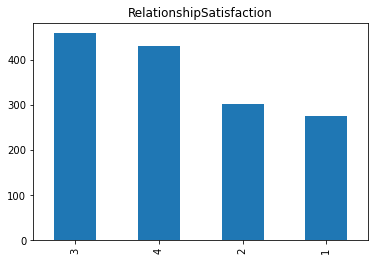

In [104]:
# 16. RelationshipSatisfaction: 대인관계 만족도
HR_att[HR_ctg[15]].value_counts().plot(kind='bar')
plt.title(HR_ctg[15])
plt.show()

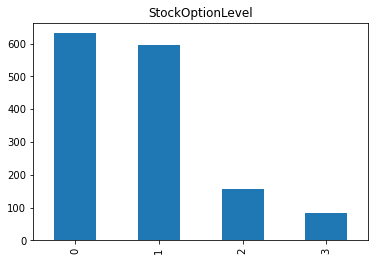

In [105]:
# 17. StockOptionLevel: 스톡옵션 정도
HR_att[HR_ctg[16]].value_counts().plot(kind='bar')
plt.title(HR_ctg[16])
plt.show()

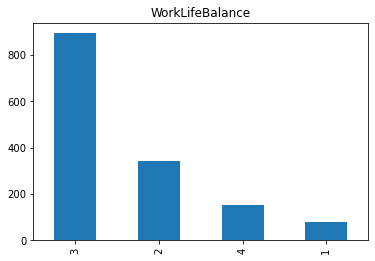

In [106]:
# 18. WorkLifeBalance: 일과 생활의 균형 정도
HR_att[HR_ctg[17]].value_counts().plot(kind='bar')
plt.title(HR_ctg[17])
plt.show()

### 2) Numerical Variable

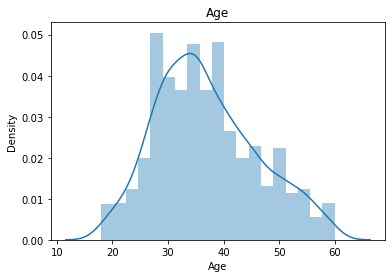

In [107]:
# 1. Age: 나이
sns.distplot(HR_att.loc[:,HR_num[0]])
plt.title(HR_num[0])
plt.show()

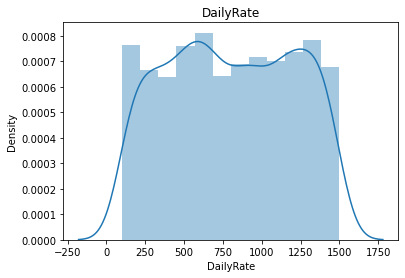

In [108]:
# 2. DailyRate: 일 대비 급여의 수준
sns.distplot(HR_att.loc[:,HR_num[1]])
plt.title(HR_num[1])
plt.show()

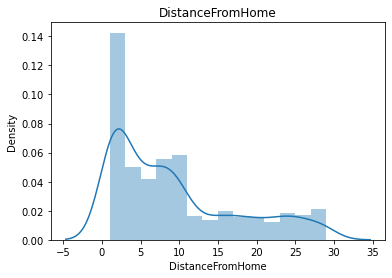

In [109]:
# 3. DistanceFromHome: 집과의 거리
sns.distplot(HR_att.loc[:,HR_num[2]])
plt.title(HR_num[2])
plt.show()

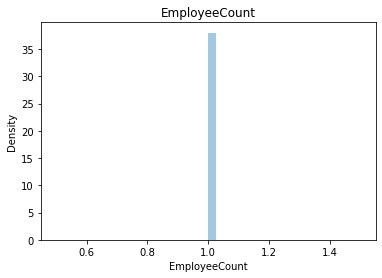

count     1470
unique       1
top          1
freq      1470
Name: EmployeeCount, dtype: int64

In [110]:
# 4. EmployeeCount: 직원 숫자
sns.distplot(HR_att.loc[:,HR_num[3]])
plt.title(HR_num[3])
plt.show()

HR_att['EmployeeCount'].astype(object).describe()
# 모두 1의 값을 가짐

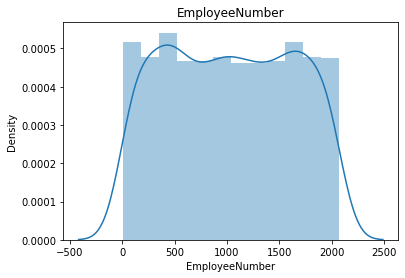

count     1470
unique    1470
top       2048
freq         1
Name: EmployeeNumber, dtype: int64

In [111]:
# 5. EmployeeNumber: 직원 ID
sns.distplot(HR_att.loc[:,HR_num[4]])
plt.title(HR_num[4])
plt.show()

HR_att['EmployeeNumber'].astype(object).describe()
# 각자 고유한 ID number 가짐

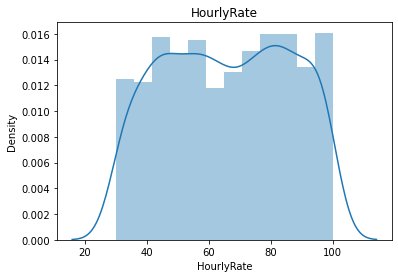

In [112]:
# 6. HourlyRate: 시간 대비 급여의 수준
sns.distplot(HR_att.loc[:,HR_num[5]])
plt.title(HR_num[5])
plt.show()

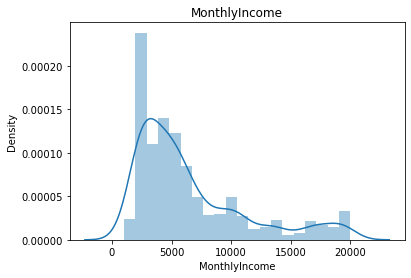

<AxesSubplot:xlabel='MonthlyIncome'>

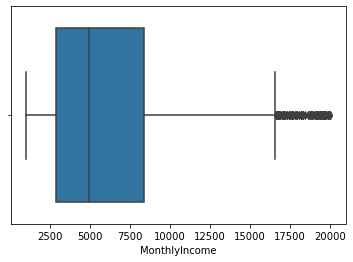

In [116]:
# 7. MonthlyIncome: 월 소득
sns.distplot(HR_att.loc[:,HR_num[6]])
plt.title(HR_num[6])
plt.show()

sns.boxplot(HR_att.loc[:,HR_num[6]]) # outlier 존재. 이상치는 아니고 극단값

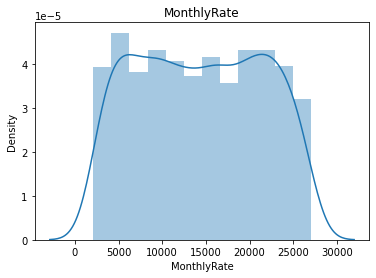

<AxesSubplot:xlabel='MonthlyRate'>

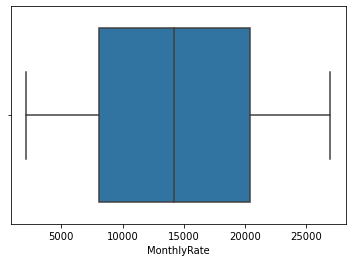

In [115]:
# 8. MonthlyRate: 월 대비 급여 수준
sns.distplot(HR_att.loc[:,HR_num[7]])
plt.title(HR_num[7])
plt.show()

sns.boxplot(HR_att.loc[:,HR_num[7]])

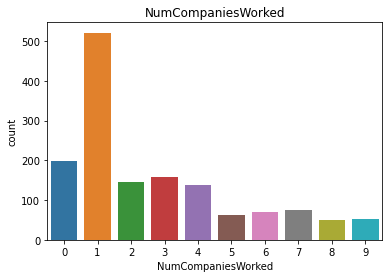

In [118]:
# 9. NumCompaniesWorked: 일한 회사의 수
sns.countplot(HR_num[8], data=HR_att)
plt.title(HR_num[8])
plt.show()

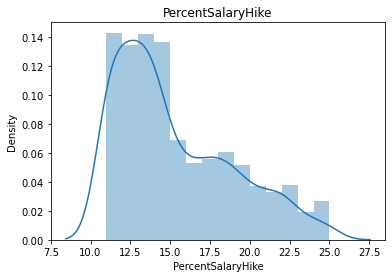

In [119]:
# 10. PercentSalaryHike: 급여의 증가분 백분율
sns.distplot(HR_att.loc[:,HR_num[9]])
plt.title(HR_num[9])
plt.show()

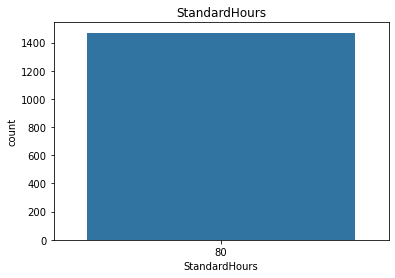

In [120]:
# 11. StandardHours: 표준 시간
sns.countplot(HR_num[10], data=HR_att)
plt.title(HR_num[10])
plt.show()
# 모두 80 Hours

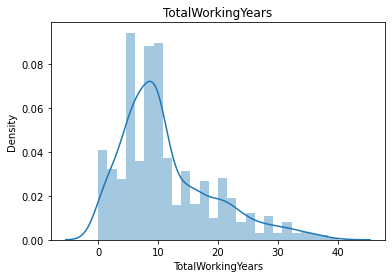

In [123]:
# 12. TotalWorkingYears: 경력 기간
sns.distplot(HR_att.loc[:,HR_num[11]])
plt.title(HR_num[11])
plt.show() 

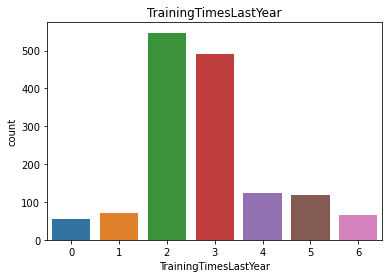

In [131]:
# 13. TrainingTimesLastYear: 교육 시간
sns.countplot(HR_att.loc[:,HR_num[12]])
plt.title(HR_num[12])
plt.show() 

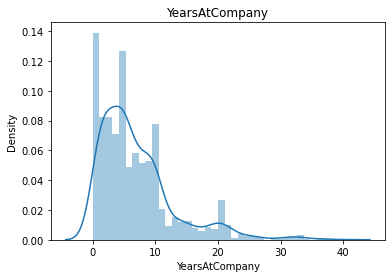

In [125]:
# 14. YearsAtCompany: 근속 연수
sns.distplot(HR_att.loc[:,HR_num[13]])
plt.title(HR_num[13])
plt.show() 

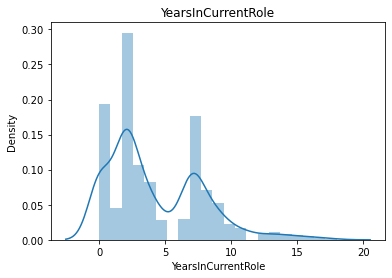

In [126]:
# 15. YearsInCurrentRole: 현재 역할의 년수
sns.distplot(HR_att.loc[:,HR_num[14]])
plt.title(HR_num[14])
plt.show() 

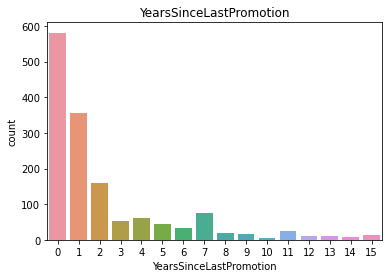

In [132]:
# 16. YearsSinceLastPromotion: 마지막 프로모션
sns.countplot(HR_att.loc[:,HR_num[15]])
plt.title(HR_num[15])
plt.show() 

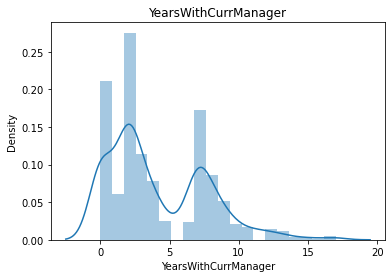

In [134]:
# 17. YearsWithCurrManager: 현재 관리자와 함께 보낸 시간
sns.distplot(HR_att.loc[:,HR_num[16]])
plt.title(HR_num[16])
plt.show()

##  변수간 관계 파악

In [ ]:
sns.heatmap(HR_att.loc[:,HR_num],annot=True)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

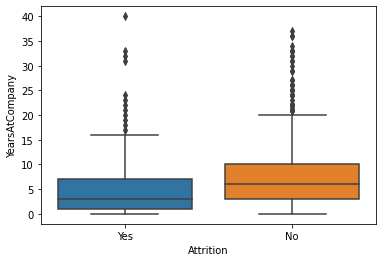

In [9]:
# 1) 퇴사여부에 따른 근속 연수 비교
sns.boxplot(x='Attrition',y='YearsAtCompany', data=HR_att)

# 퇴사자의 근속 연수가 더 짧음

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

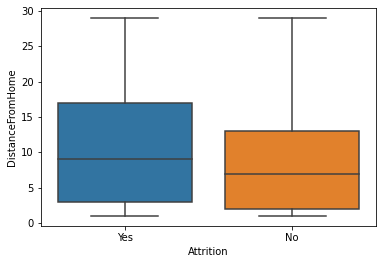

In [27]:
# 2) 퇴사여부에 따른 집과의 거리 비교
sns.boxplot(x='Attrition',y='DistanceFromHome', data=HR_att)

# 퇴사자의 집과의 거리가 퇴사하지 않은 직원에 비해 더 멀다. 유의한 차이인지는 분석해봐야 함

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

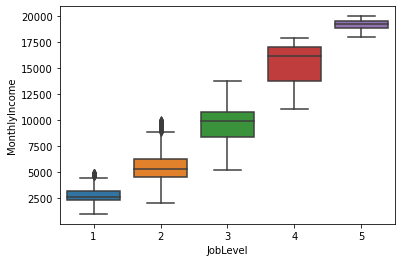

In [10]:
# 3) 업무 수준(JobLevel)에 따른 월 대비 급여수준(MonthlyRate) 분포
sns.boxplot(x='JobLevel',y='MonthlyIncome', data=HR_att)

# 해석: 업무수준이 높을수록 월 대비 급여수준 높음 

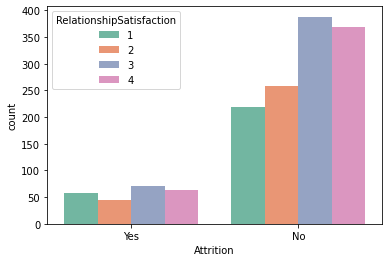

In [25]:
# 4) 대인관계 만족도 별 퇴사여부 분포
sns.countplot(hue='RelationshipSatisfaction',x='Attrition',data=HR_att, palette='Set2')
plt.show()

# 퇴사하지 않은 직원의 대인관계 만족도가 더 높게 분포함

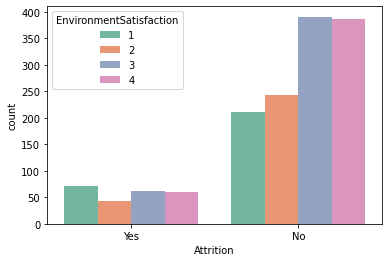

In [24]:
# 5) 퇴사 여부에 따른 업무환경에 대한 만족도 비교
sns.countplot(x='Attrition',hue='EnvironmentSatisfaction',data=HR_att, palette='Set2')
plt.show()

# 해석: 퇴사하지 않은 경우 만족도가 더 높게 분포, 퇴사자의 경우 만족도1이 제일 많음

### 수치형 변수간 상관관계

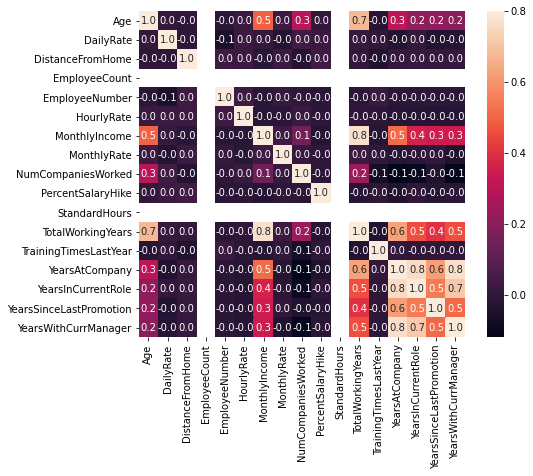

In [31]:
def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.1f', square=True);
  
draw_corrmat(HR_att.loc[:,HR_num])
